### K-최근접 이웃 회귀 (K-Nearest Neighbors)
- 전에 진행한 knn 비지도학습
- 지도학습, 정답이 있음
- 전에 했던 것은 정답이 없기 때문에 이웃에 대한 라벨을 정할 때 정답이 아닌 실루엣, 엘보우 같은 지표를 사용해서 최적의 k를 찾았다.
- 회귀 지도학습 -> 정답이 있다.
- 정답 값을 가지고 k 개수를 찾아볼 수 있다.
- knn 이웃에 접근하는 방법만 같지, 회귀와 분류로 나눠진다.
- knn 회귀 (Regression), 분류(Classification)도 있다.

- 원리를 살펴보면?
- 거리기반의 가장 가까운 k개 이웃을 찾고 근처 k개의 정답의 평균을 계산해서 예측
- 영화평점 데이터에서
- 가장 가까운 (특성이 유사한) 영화가 3개 있는데 5.0, 6.8, 9.2의 등급을 가졌다면 해당 값은 3개의 평균인 7.0이라고 예측 (정답)

- 3개의 영화를 k 군집으로 잡았는데, 해당 3개 영화 중에서 더 가까운 데이터가 있을 것
- 단순하게 평균으로만 잡게되면 가중치를 놓칠 수가 있다.
- 해당 3개 영화의 데이터에 거리까지 입력해서 평점을 예측해야한다.
- 가중평균을 이용해서 거리가 가까울수록 데이터가 더 유사할 것이라고 보고 가중치를 부여하는 것

- ex)
- A 영화 / 평점 5.0 / x까지 거리 3.2
- B 영화 / 평점 6.8 / x까지 거리 10.5
- C 영화 / 평점 9.2 / x까지 거리 1.1
- 단순 평균 계산인 경우는 예측 값이 7.0이지만
- 거리기반으로 가중평균을 계산해 보면 다른 값이 나온다.

In [1]:
(5.0+6.8+9.2)/3 # 그냥 평균 계산

7.0

In [2]:
(5.0/3.2+6.8/10.5+9.2/1.1)/(1/3.2+1/10.5+1/1.1) # 가중평균 계산

8.02971029381549

In [3]:
from sklearn.neighbors import KNeighborsRegressor

In [4]:
import numpy as np
x1 = np.arange(1,11)
x = x1.reshape(-1,1)
y = np.arange(1,11)*5

In [5]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [6]:
y

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

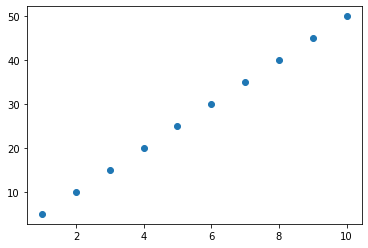

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y)
plt.show()

In [8]:
knn_model = KNeighborsRegressor(n_neighbors=2).fit(x,y)

In [9]:
knn_model

KNeighborsRegressor(n_neighbors=2)

In [10]:
print(knn_model.predict([[3]]))

[12.5]


In [11]:
(10+15)/2

12.5

- knn 한계

In [12]:
print(knn_model.predict([[10]]))

[47.5]


In [13]:
print(knn_model.predict([[15]]))

[47.5]


In [14]:
print(knn_model.predict([[30]]))

[47.5]


In [15]:
print(knn_model.predict([[100]]))

[47.5]


- 거리기반이다보니 기존에 나타난 데이터에서 벗어난 범위는 정확하게 예측하기가 어렵다.

- 가중평균을 주고 데이터 값을 예측해 보자!

In [16]:
knn_model = KNeighborsRegressor(n_neighbors=2, weights="distance").fit(x,y)

In [17]:
knn_model

KNeighborsRegressor(n_neighbors=2, weights='distance')

In [20]:
print(knn_model.predict(np.arange(3,4).reshape(-1,1)))

[15.]


- KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=2, p=2, weights='uniform')
- weights="uniform" 거리기반 파라미터 {"uniform" 디폴트값, "distance" 거리기반}, 사용자 함수로 거리를 만들 수 있다.
- algorithm="auto", Brute Force, K-DTree, Ball Tree 등이 있다.
- p 값
- 민코프스키 거리를 가지고 차수를 증가해서 p1이 되면 민코프스키, p2가 되면 유클리디안. p값이 올라갈수록 체비셰프 거리
- 거리를 어떤 식으로 측정하냐에 따라서 달라질 수 있다.

In [44]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd

In [51]:
boston = load_boston()

data = pd.DataFrame(boston["data"], columns=boston["feature_names"])
target = pd.DataFrame(boston["target"], columns=["target"])

df = pd.concat([data, target], axis=1)
df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)

In [53]:
X_train

array([[2.00900e-02, 9.50000e+01, 2.68000e+00, ..., 1.47000e+01,
        3.90550e+02, 2.88000e+00],
       [7.50260e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.94330e+02, 1.63000e+01],
       [6.28807e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.18010e+02, 1.77900e+01],
       ...,
       [3.73800e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.89400e+02, 6.75000e+00],
       [9.96654e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.86730e+02, 1.88500e+01],
       [6.26300e-02, 0.00000e+00, 1.19300e+01, ..., 2.10000e+01,
        3.91990e+02, 9.67000e+00]])

### 회귀이기 때문에 정답에 대해서 평가하는 방법이 RMSE
- k값의 변화에 따라 어떤 식으로 값이 달라지는지 확인해 보자!

In [54]:
rmse_val = []
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors=K)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print("RMSE value k", K, "=", error)

RMSE value k 1 = 8.627634579151607
RMSE value k 2 = 8.169950320246391
RMSE value k 3 = 8.00817732941982
RMSE value k 4 = 7.959997644472013
RMSE value k 5 = 8.226191075330254
RMSE value k 6 = 8.304104623303541
RMSE value k 7 = 8.55597825532313
RMSE value k 8 = 8.576741055456491
RMSE value k 9 = 8.61865549052138
RMSE value k 10 = 8.668654994390117
RMSE value k 11 = 8.736804203529564
RMSE value k 12 = 8.442672928108962
RMSE value k 13 = 8.342591527298021
RMSE value k 14 = 8.180129755029785
RMSE value k 15 = 8.30500382017727
RMSE value k 16 = 8.372335849852213
RMSE value k 17 = 8.352125632328212
RMSE value k 18 = 8.354460491648263
RMSE value k 19 = 8.351824121803205
RMSE value k 20 = 8.368602780631901


In [55]:
rmse_val = []
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors=K, weights="distance")
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print("RMSE value k", K, "=", error)
print("최솟값 rmse", min(rmse_val))

RMSE value k 1 = 8.627634579151607
RMSE value k 2 = 8.166333993560812
RMSE value k 3 = 8.028767566606533
RMSE value k 4 = 7.949253130121881
RMSE value k 5 = 8.114734398327467
RMSE value k 6 = 8.116574755021013
RMSE value k 7 = 8.320669219775985
RMSE value k 8 = 8.338315672700977
RMSE value k 9 = 8.368760408069937
RMSE value k 10 = 8.402172261393302
RMSE value k 11 = 8.447092216022686
RMSE value k 12 = 8.237257099359168
RMSE value k 13 = 8.19309525304304
RMSE value k 14 = 8.081594703118897
RMSE value k 15 = 8.164722493876576
RMSE value k 16 = 8.204041492063862
RMSE value k 17 = 8.195321818780197
RMSE value k 18 = 8.199746894872725
RMSE value k 19 = 8.194196355163827
RMSE value k 20 = 8.203950000848371
최솟값 rmse 7.949253130121881


<AxesSubplot:>

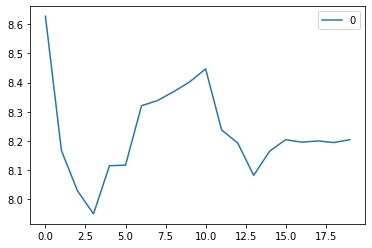

In [56]:
curve = pd.DataFrame(rmse_val)
curve.plot()

### 거리기반의 차이를 시각화로 확인해보자!

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

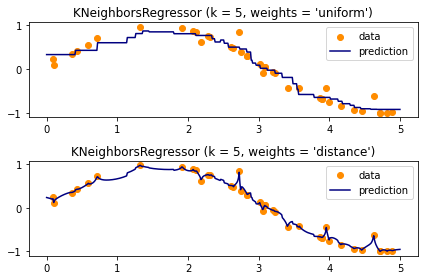

In [58]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

In [59]:
# 민코프스키 거리
rmse_val = []
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors=K, weights="distance", p=1)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print("RMSE value k", K, "=", error)
print("최솟값 rmse", min(rmse_val))

RMSE value k 1 = 8.487372396453358
RMSE value k 2 = 7.338921227359025
RMSE value k 3 = 7.305424295373708
RMSE value k 4 = 7.1505073620028385
RMSE value k 5 = 7.260017996062522
RMSE value k 6 = 7.345289855305774
RMSE value k 7 = 7.22923625107395
RMSE value k 8 = 7.389635807465889
RMSE value k 9 = 7.540195921582799
RMSE value k 10 = 7.5769986457689695
RMSE value k 11 = 7.643875400041863
RMSE value k 12 = 7.650332759756515
RMSE value k 13 = 7.7435729419105614
RMSE value k 14 = 7.687575256034083
RMSE value k 15 = 7.739394434118203
RMSE value k 16 = 7.777063841844893
RMSE value k 17 = 7.770140264520188
RMSE value k 18 = 7.824215282910025
RMSE value k 19 = 7.837100942461452
RMSE value k 20 = 7.828063395377962
최솟값 rmse 7.1505073620028385


In [60]:
# 유클리디안 거리
rmse_val = []
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors=K, weights="distance", p=2)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print("RMSE value k", K, "=", error)
print("최솟값 rmse", min(rmse_val))

RMSE value k 1 = 8.627634579151607
RMSE value k 2 = 8.166333993560812
RMSE value k 3 = 8.028767566606533
RMSE value k 4 = 7.949253130121881
RMSE value k 5 = 8.114734398327467
RMSE value k 6 = 8.116574755021013
RMSE value k 7 = 8.320669219775985
RMSE value k 8 = 8.338315672700977
RMSE value k 9 = 8.368760408069937
RMSE value k 10 = 8.402172261393302
RMSE value k 11 = 8.447092216022686
RMSE value k 12 = 8.237257099359168
RMSE value k 13 = 8.19309525304304
RMSE value k 14 = 8.081594703118897
RMSE value k 15 = 8.164722493876576
RMSE value k 16 = 8.204041492063862
RMSE value k 17 = 8.195321818780197
RMSE value k 18 = 8.199746894872725
RMSE value k 19 = 8.194196355163827
RMSE value k 20 = 8.203950000848371
최솟값 rmse 7.949253130121881


In [61]:
# 체비셰프 거리
rmse_val = []
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors=K, weights="distance", p=3)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print("RMSE value k", K, "=", error)
print("최솟값 rmse", min(rmse_val))

RMSE value k 1 = 8.902296465122983
RMSE value k 2 = 8.208431259166355
RMSE value k 3 = 8.220112344758808
RMSE value k 4 = 8.288269845684312
RMSE value k 5 = 8.402661183046016
RMSE value k 6 = 8.501645061527405
RMSE value k 7 = 8.350254685048096
RMSE value k 8 = 8.408344550347815
RMSE value k 9 = 8.448723415134573
RMSE value k 10 = 8.478217829713593
RMSE value k 11 = 8.39340382285723
RMSE value k 12 = 8.355144542540868
RMSE value k 13 = 8.39998938455885
RMSE value k 14 = 8.404153210340404
RMSE value k 15 = 8.406801341107766
RMSE value k 16 = 8.38781982069027
RMSE value k 17 = 8.40309699666376
RMSE value k 18 = 8.33086752101871
RMSE value k 19 = 8.301064078849926
RMSE value k 20 = 8.32175828596284
최솟값 rmse 8.208431259166355


### RadiusNeighborsRegressor(radius=K)
- 고정된 반지름의 길이를 지정하여 그 기반으로 근접이웃을 설정하여 값을 계산한다.

### 필수과제
- 영화데이터의 평점을 예측하는 KNN 회귀 모델링 진행하기
